In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics.cluster import contingency_matrix

Была создана функция для создания набора данных

In [ ]:

def make_data(n, seed):
    np.random.seed(seed) # устанавливаем значение для генератора случайных чисел

    shift_matrix = np.array([[3, 3],  # создаём матрицу свдига, которая содержит значения сдвига для каждого измерения данных
                             [6, 9],
                             [9, 3]])

    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1)) # генерируем массив случайных чисел с формой (3, 2, n), это будет набор данных, которые будут сдвинуты
                                                                      #, затем происходит смещение путем добавления матрицы сдвига
    data = np.swapaxes(data, 1, 2)  # замена второго и третьего измерений данных, данные становятся массивом с формой (3, n, 2)

    data = data.reshape((-1, 2)) # данные преобразуются в массив с формой (-1,2)

    data *= np.array([[20, 0.5]]) # данные умножаются на массив коэффициентов, данные масштабируются

    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]}, # создаётся датафрейм
                      columns=['x', 'y'])
    df = df.sample(frac=1.0) # перемешивается датафрейм

    return df

Функция была применена с параметром n = 40 и параметром seed = 7 для train, с параметром n = 40, и параметром seed = 10 для test.

In [ ]:
df_train = make_data(35,5)

df_test = make_data(40,10)


Была проведена стандартизация данных

In [ ]:
scaler = StandardScaler()
df_train_scaled = scaler.fit_transform(df_train)
df_test_scaled = scaler.transform(df_test)  # стандартизированные данные для кластеризации

Была обучена модель для кластеризации методом KMeans для трёх кластеров

In [ ]:
k_means1 = KMeans(n_clusters = 3, random_state = 0) # в параметрах задается число кластеров, равное 3, и фиксируется значение random_state для воспроизводимости результата
clusters_train1 = k_means1.fit_predict(df_train)
 # применение алгоритма к стандартизи-рованным данным и формирование вектора с метками кластеров

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Была выполнена визуализация данных, на графике были помечены центры кластеров, объекты были перекрашены разными цветами

Text(0, 0.5, 'Значения Y')

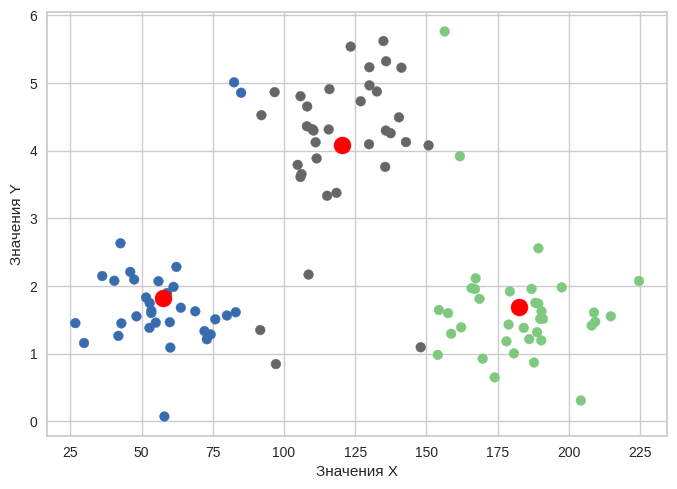

In [ ]:

plt.scatter(df_train["x"],df_train["y"],  c = clusters_train1, cmap = 'Accent')
centers_train1 = k_means1.cluster_centers_
plt.scatter(centers_train1[:,0],centers_train1[:,1], s = 150, marker = 'o', c = "red")
plt.xlabel("Значения X")
plt.ylabel("Значения Y")

По данному графику можно сделать вывод, что модель разделил данные на три кластера, каждый из которых отделен от других, центры кластеров находятся примерно в середине каждой из групп, а значит, что модель успешно выполнила свою задачу

Были использованы данные test, с помощью которых было сделано предсказание, построен график для тестовых данных, на графике были отмечены центры кластеров, объекты были перекрашены разными цветами.

Text(0, 0.5, 'Значения Y')

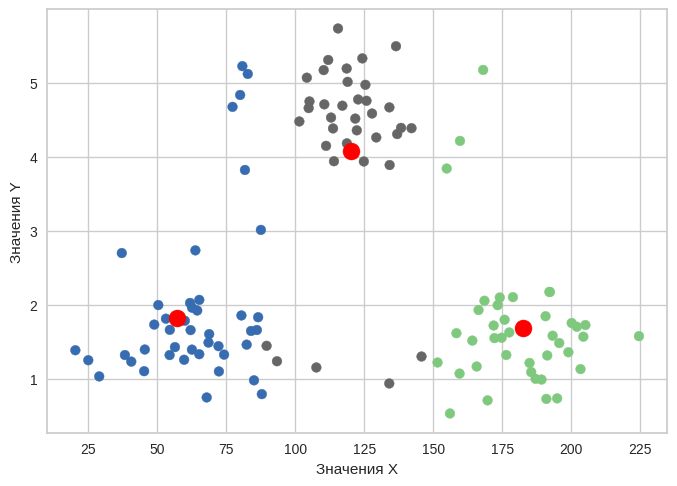

In [ ]:
clusters_test1 = k_means1.predict(df_test)
plt.scatter(df_test["x"],df_test["y"],  c = clusters_test1, cmap = 'Accent')
centers_test1 = k_means1.cluster_centers_
plt.scatter(centers_test1[:,0],centers_test1[:,1], s = 150, marker = 'o', c = "red")
plt.xlabel("Значения X")
plt.ylabel("Значения Y")

По данному графику можно сделать вывод, что модель хуже работает на наборе данных test, потому что она не была обучена на этих данных, однако, можно заметить, что модель всё ещё достаточно точно разделила данные на три группы.

Были подсчитаны коэффициенты силуэта

In [ ]:
score_train = silhouette_score(df_train_scaled, clusters_train1)
print("Качество кластеризации по метрике Cилуэта", score_train)

score_test = silhouette_score(df_test_scaled, clusters_test1)
print("Качество кластеризации по метрике Cилуэта", score_test)

Качество кластеризации по метрике Cилуэта 0.585056436159086
Качество кластеризации по метрике Cилуэта 0.5417112844784558


По данным значениям можно сделать вывод, что для набора данных df_train модель лучше сгруппировала данные, чем для набора данных df_test.

Была обучена модель для кластеризации методом KMeans для двух кластеров

In [ ]:
k_means1 = KMeans(n_clusters = 2, random_state = 0) # в параметрах задается число кластеров, равное 3, и фиксируется значение random_state для воспроизводимости результата
clusters_train = k_means1.fit_predict(df_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Была выполнена визуализация данных, на графике были помечены центры кластеров, объекты были перекрашены разными цветами

Text(0, 0.5, 'Значения Y')

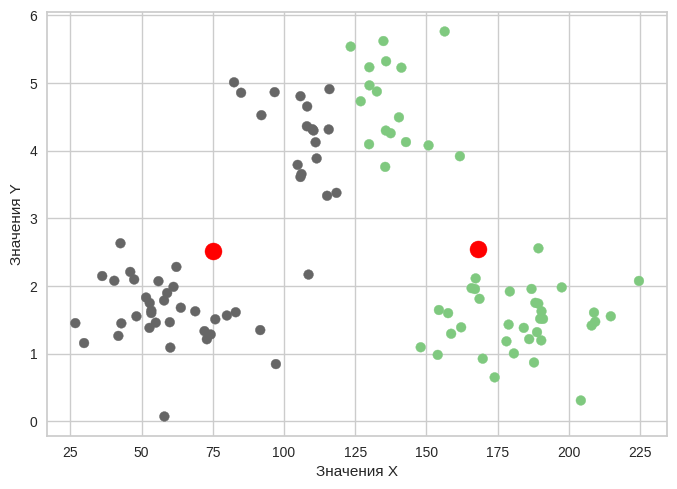

In [ ]:
plt.scatter(df_train["x"],df_train["y"],  c = clusters_train, cmap = 'Accent')
centers_train = k_means1.cluster_centers_
plt.scatter(centers_train[:,0],centers_train[:,1], s = 150, marker = 'o', c = "red")
plt.xlabel("Значения X")
plt.ylabel("Значения Y")

По данному графику можно сделать вывод, что модель менее точно группирует данные, чем модель для трех кластеров, т.к. данные отдалены от центров кластеров

Были использованы данные test, с помощью которых было сделано предсказание, построен график для тестовых данных, на графике были отмечены центры кластеров, объекты были перекрашены разными цветами.

Text(0, 0.5, 'Значения Y')

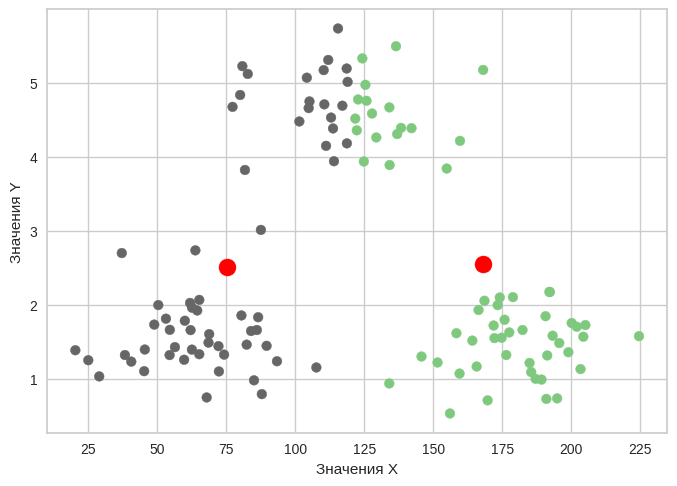

In [ ]:
clusters_test = k_means1.predict(df_test)
plt.scatter(df_test["x"],df_test["y"],  c = clusters_test, cmap = 'Accent')
centers_test = k_means1.cluster_centers_
plt.scatter(centers_test[:,0],centers_test[:,1], s = 150, marker = 'o', c = "red")
plt.xlabel("Значения X")
plt.ylabel("Значения Y")

По данному графику можно сделать вывод, что модель без обучения хуже группирует данные, чем модель с обучением, т.к. данные находятся дальше от центра кластеризации

Были подсчитаны коэффициенты силуэта

In [ ]:
score_train2 = silhouette_score(df_train_scaled, clusters_train)
print("Качество кластеризации по метрике Cилуэта", score_train)

score_test2 = silhouette_score(df_test_scaled, clusters_test)
print("Качество кластеризации по метрике Cилуэта", score_test2)

Качество кластеризации по метрике Cилуэта 0.585056436159086
Качество кластеризации по метрике Cилуэта 0.372268976646104


Сравнив эти значения со значениями качеств кластеризации по метрике Силуэта для модели с тремя кластерами, можно сделать вывод, что данная модель менее точно группирует данные

Была обучена модель для кластеризации методом KMeans для четырех кластеров

In [ ]:
k_means = KMeans(n_clusters = 4, random_state = 0) # в параметрах задается число кластеров, равное 3, и фиксируется значение random_state для воспроизводимости результата
clusters_train4 = k_means.fit_predict(df_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Была выполнена визуализация данных, на графике были помечены центры кластеров, объекты были перекрашены разными цветами

Text(0, 0.5, 'Значения Y')

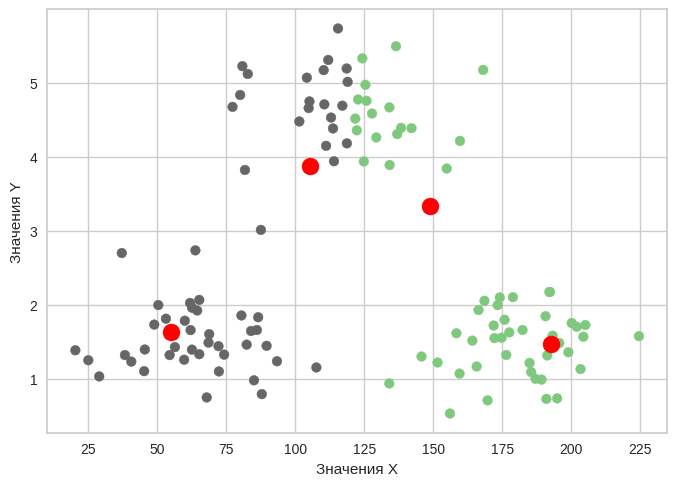

In [ ]:
plt.scatter(df_test["x"],df_test["y"],  c = clusters_test, cmap = 'Accent')
centers_train4 = k_means.cluster_centers_
plt.scatter(centers_train4[:,0],centers_train4[:,1], s = 150, marker = 'o', c = "red")
plt.xlabel("Значения X")
plt.ylabel("Значения Y")

По данному графику можно сделать вывод, что модель кластеризации для четырех кластеров, на наборе данных df_train предсказывает значения менее точно, чем модель с количеством кластеров = 2 и равным 3, т.к. групп стало больше и стало сложнее группировать их по общим признакам

Были использованы данные test, с помощью которых было сделано предсказание, построен график для тестовых данных, на графике были отмечены центры кластеров, объекты были перекрашены разными цветами.

Text(0, 0.5, 'Значения Y')

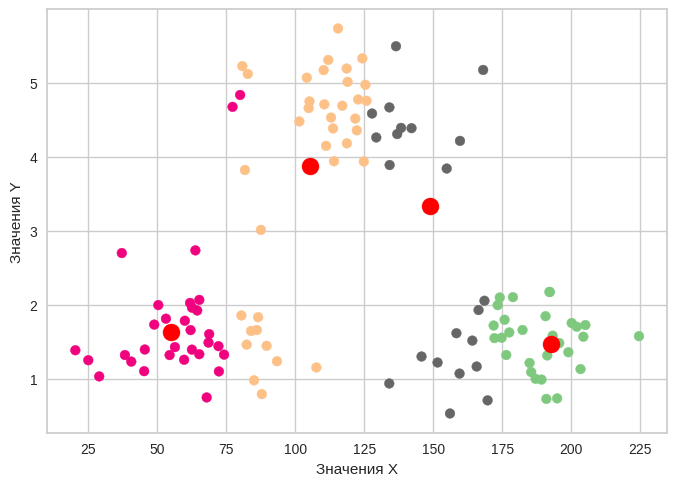

In [ ]:
clusters_test = k_means.predict(df_test)
plt.scatter(df_test["x"],df_test["y"],  c = clusters_test, cmap = 'Accent')
centers_test4 = k_means.cluster_centers_
plt.scatter(centers_test4[:,0],centers_test4[:,1], s = 150, marker = 'o', c = "red")
plt.xlabel("Значения X")
plt.ylabel("Значения Y")

Набор данных df_test был сгруппирован моделью менее точно, чем набор данных df_train, т.к. на данных значениях модель не была обучена

Были подсчитаны коэффициенты силуэта

In [ ]:
score_train = silhouette_score(df_train_scaled, clusters_train)
print("Качество кластеризации по метрике Cилуэта", score_train)

score_test = silhouette_score(df_test_scaled, clusters_test)
print("Качество кластеризации по метрике Cилуэта", score_test)

Качество кластеризации по метрике Cилуэта 0.3955954584782649
Качество кластеризации по метрике Cилуэта 0.3040693197498514


Сравнив данные значения со значениями модели с двумя и тремя кластерами можно прийти к выводу, что она наименее точно группирует значения

Был построен график по методу "локтя"

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

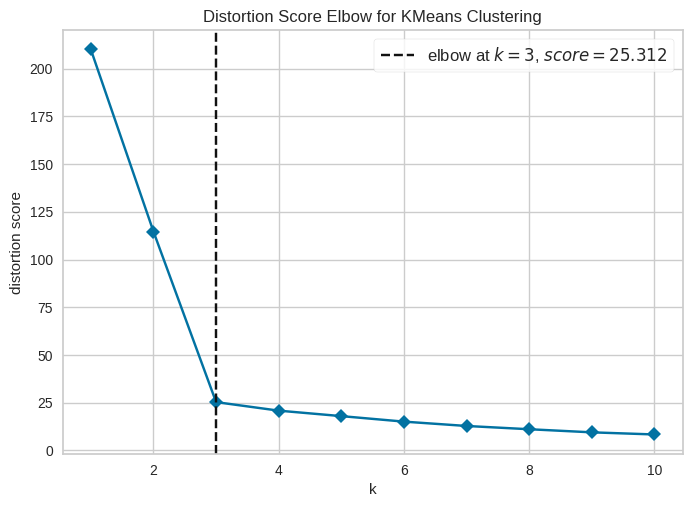

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer = KElbowVisualizer(k_means1, k=(1,11), timings=False)
visualizer.fit(df_train_scaled)
visualizer.show()

По данному графику можно сделать вывод, что оптимальным количеством кластеров для моего набора данных является 3

# **ЧАСТЬ 2**

Был загружен набор данных

In [ ]:
df = pd.read_csv("/content/5gym_churn.csv")

Была произведена предварительная обработка данных

Была выведена информация о данных с помощью info.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Можно сделать вывод, что датасет не содержит нуль строк, также можно заметить, что в строках Month_to_end_contract неверный тип данных, который далее будет изменен.

Датасет содержит следующие данные:
*   1 Gender - Пол

*   2 Near_Location - Близкое расположение

*   3 Partner - Сотрудник компании партнера

*   4 Promo_friends - По промо друзей

*   5 Phone -  Указан ли телефон

*   6 Contract_period - Длительность текущего абонемента

*   7 Group_visits - Посещение групповых занятий

*   8 Age - Возраст

*   9 Avg_additional_charges_total - Средние траты на дополнительные услуги

*   10 Month_to_end_contract - Количество месяцев до окончания абонемента

*   11 Lifetime - время с момента первого обращения в фитнесцентр (в месяцах)

*   12 Avg_class_frequency_total - средняя частота посещений в неделю за все время с начала действия абонемента

*   13 Month_to_end_contract - средняя частота посещений в неделю за предыдущий месяц

*   14 Churn - факт ухода из клуба















Было выведено количество дубликатов

In [ ]:
df.duplicated().sum()

0

Тип данных для столбца Month_to_end_contract был изменен на int.

In [ ]:
df['Month_to_end_contract'] = df['Month_to_end_contract'].astype(int)

In [ ]:
df.head(200)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,1,0,0,0,1,0,29,241.701674,1,4,1.690380,1.595065,0
196,1,1,1,1,1,12,1,33,235.639765,9,6,1.538506,1.617701,0
197,1,1,0,0,1,1,0,27,184.172449,1,2,1.381842,1.588576,1
198,0,1,1,1,1,12,1,27,111.265846,12,5,0.792885,0.876397,0


В данном наборе данных можно выделить целевой переменной переменную Churn, которую можно было бы предсказать. Была выведена матрица диаграмм рассеяния

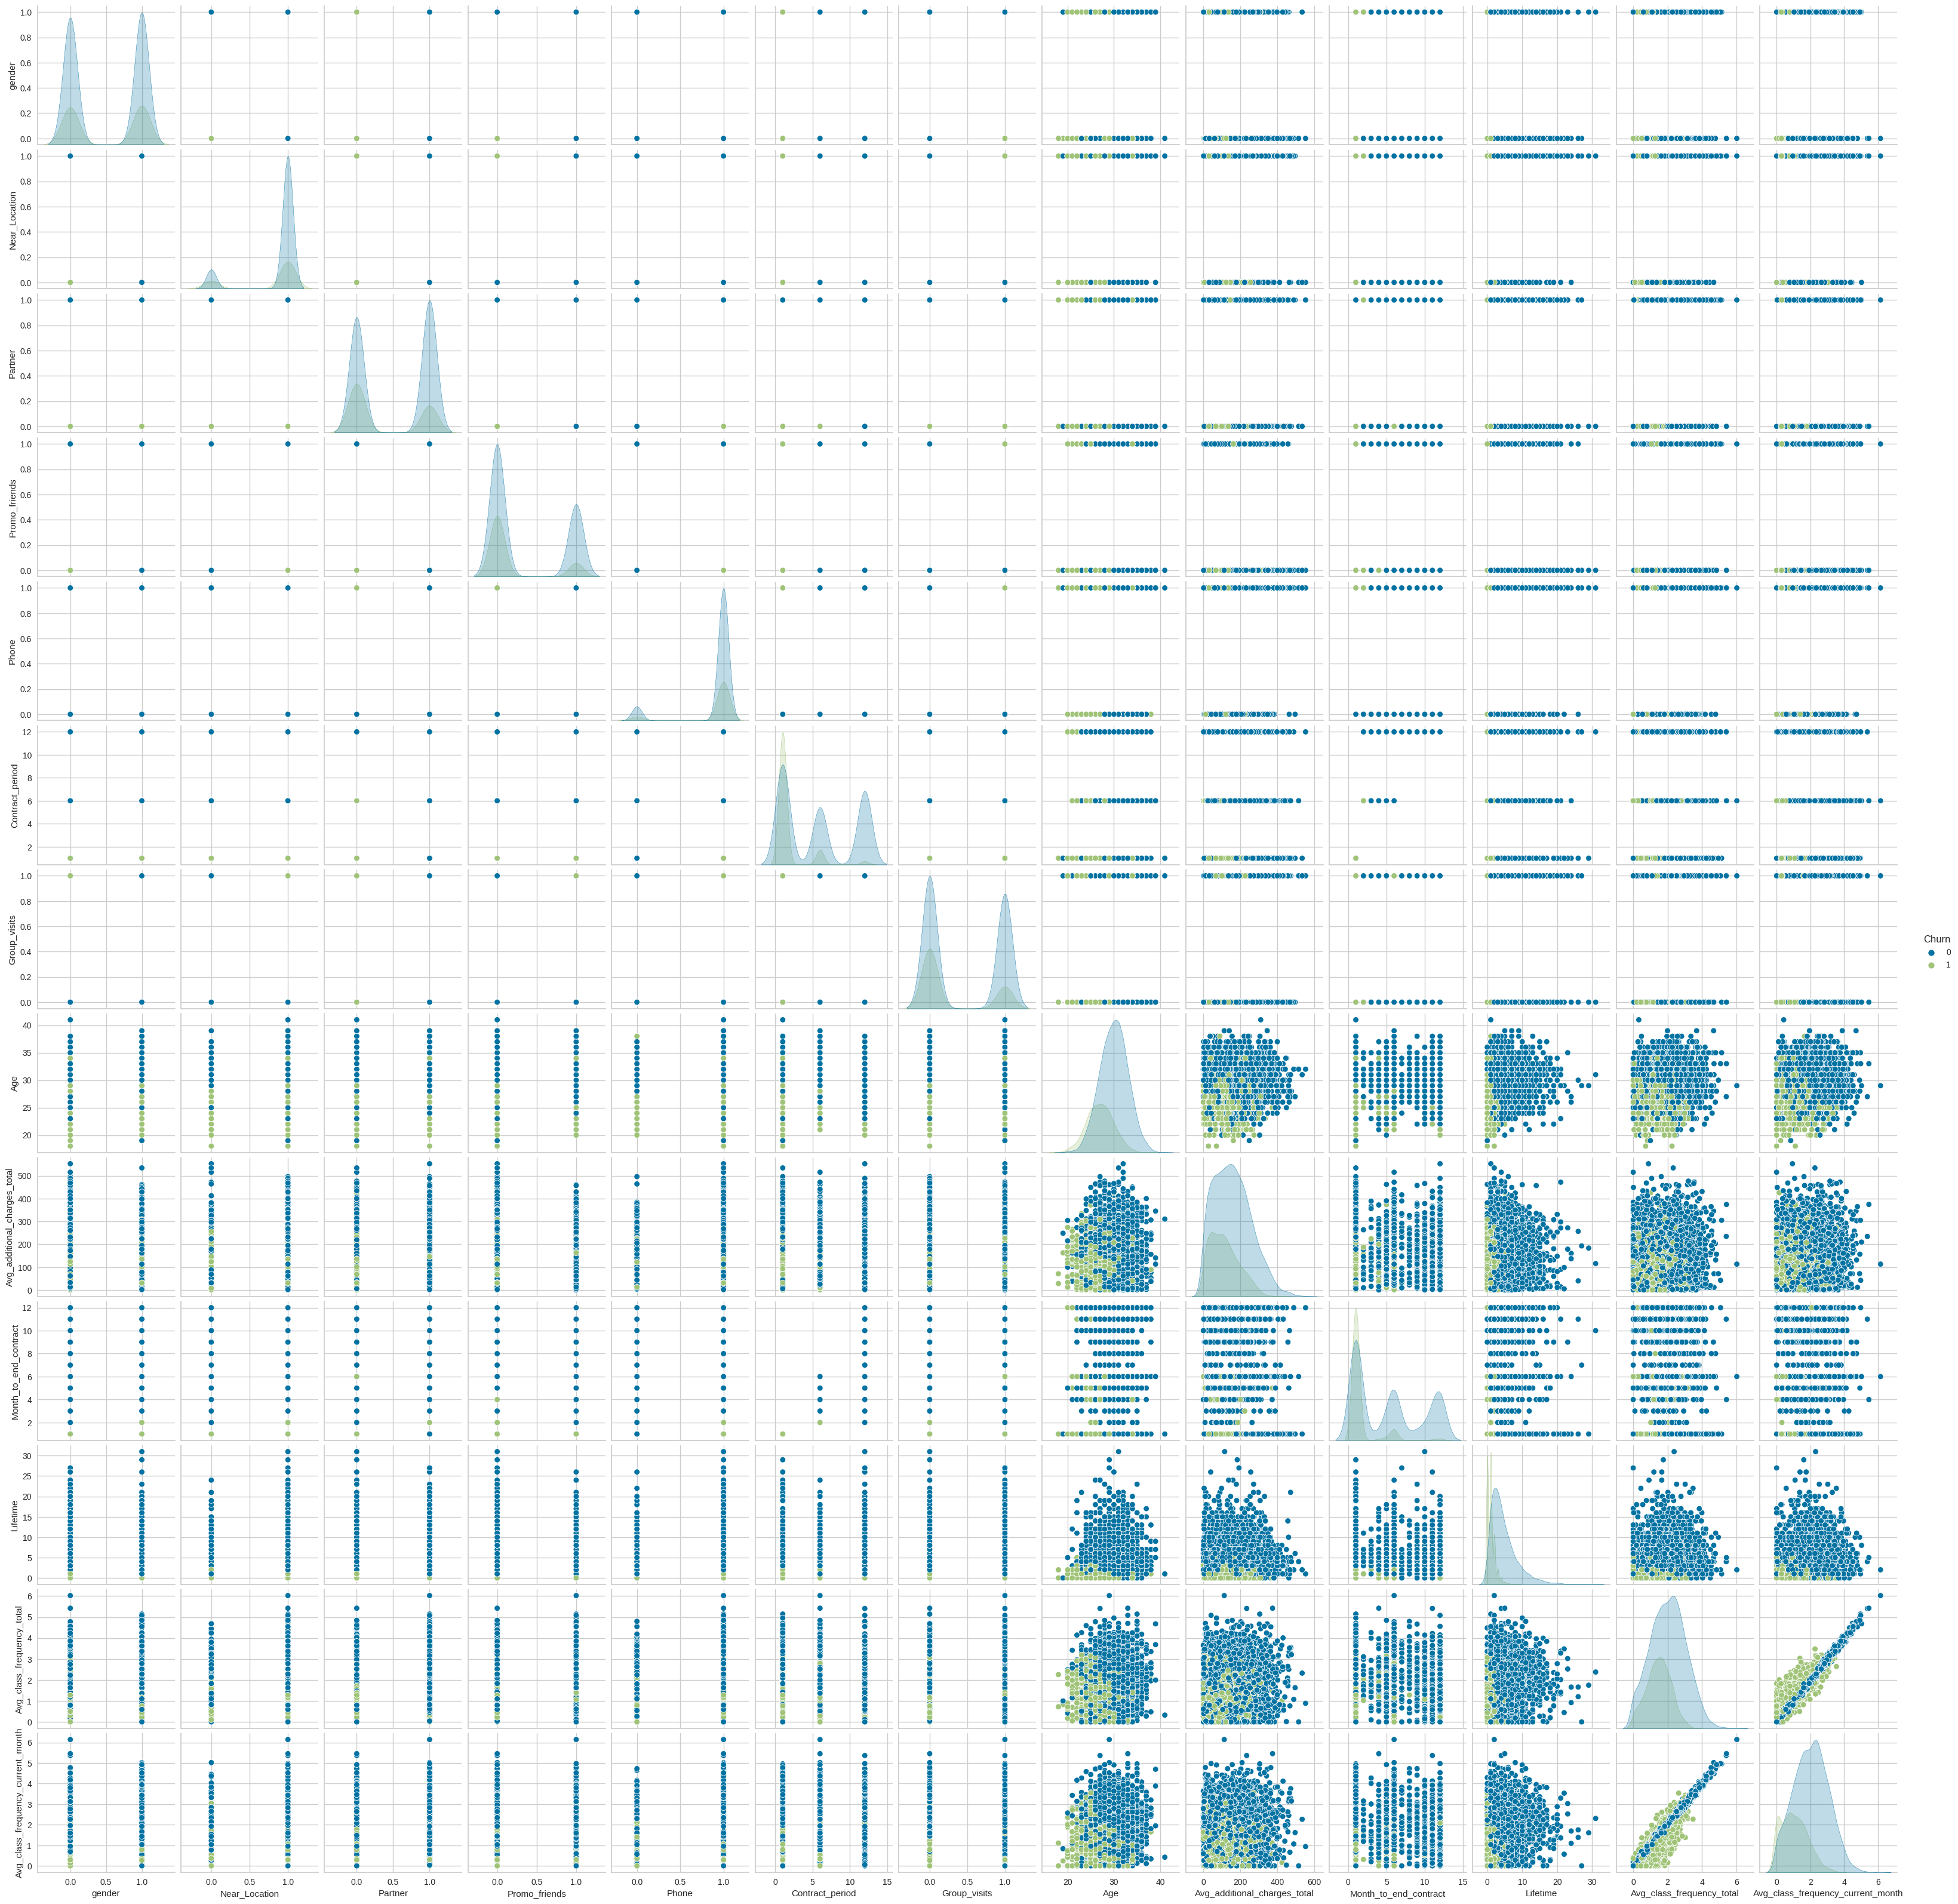

In [ ]:

sns.pairplot(df, y_vars = ['gender','Near_Location','Partner','Promo_friends','Phone', 'Contract_period','Group_visits','Age','Avg_additional_charges_total','Month_to_end_contract','Lifetime','Avg_class_frequency_total','Avg_class_frequency_current_month'], hue = 'Churn')

По данной матрице рассеяния можно сделать выводы, что

*   Уходят из клуба чаще те, у кого время с момента первого обращения в фитнесцентр меньшее
*   Уходят из клуба чаще те, кто меньше всего дней в неделю и в месяц посещал фитнесцентр

*   Также можно сказать, что чем ниже возраст тем чаще посетители прекращают посещать фитнесцентр





Была выполнена стандартизация данных.

In [ ]:
X = np.array(df.drop(['Churn'], axis = 1))
Y = np.array(df['Churn'])
scaler = StandardScaler()

# Стандартизация данных
scaled_data = scaler.fit_transform(X)

# Преобразование стандартизованных данных обратно в DataFrame
df_scaled = scaler.transform(X)

In [ ]:
df_scaled


array([[ 0.97970588,  0.42788074,  1.02686062, ..., -0.19332863,
        -1.91191971, -1.67847198],
       [-1.0207145 ,  0.42788074, -0.973842  , ...,  0.87368001,
         0.04517569,  0.1360137 ],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.46008079,
        -0.02049263, -0.02901851],
       ...,
       [ 0.97970588,  0.42788074,  1.02686062, ..., -0.46008079,
         0.93313947,  1.01103141],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.19332863,
        -0.25604937, -0.16225246],
       [ 0.97970588, -2.33709981,  1.02686062, ..., -0.72683295,
        -0.79947418, -0.69509885]])

Был авыполнена кластеризация объектов методом k-means, было подобрано оптимальное количество кластеров с помощью метода локтя.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

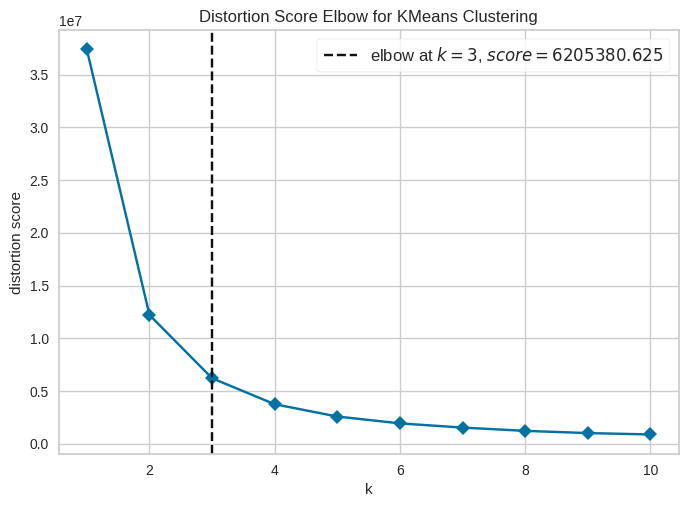

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
k_means = KMeans(n_clusters = 3, random_state = 0) # в параметрах задается число кластеров, равное 3, и фиксируется значение random_state для воспроизводимости результата
clusters_predict = k_means.fit_predict(df_scaled)
df['cluster'] = clusters_predict

 # применение алгоритма к стандартизи-рованным данным и формирование вектора с метками кластеров
visualizer = KElbowVisualizer(k_means, k=(1,11), timings=False)
visualizer.fit(X)
visualizer.show()

Наилучшим количеством кластеров оказалось три кластера.

Были определены объекты, относящиеся к одному кластеру и сделаны выводы о каждом кластере, подсчитаны средние показатели по каждому признаку каждого кластера.

In [ ]:
dsdsds = df.groupby(['cluster']).mean()
dsdsds

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.546632,0.871330,0.341105,0.216753,0.903282,2.446459,0.455095,30.034542,157.980208,2.278066,4.847150,2.723453,2.712367,0.087219
1,0.508361,0.939799,0.775084,0.566890,0.897993,10.700669,0.540134,29.894649,161.953677,9.788462,4.679766,1.964206,1.954389,0.030100
2,0.486027,0.758202,0.379708,0.185298,0.907655,1.879708,0.289186,28.069866,128.272924,1.789793,2.241191,1.223044,0.965879,0.561361


По данным значениям можно сделать вывод о том, что:


*   В 1 кластере:

> Небольшой перевес в сторону одного из полов

> Почти все пользователи живут недалеко от фитнес клуба

> В среднем посещают фитнес-клуб 3 раза в неделю

> Ходили уже на протяжении 4-5 месяцев

> Малое количество пользователей покинуло фитнес клуб (8%)

*   В 2 кластере


> В среднем контракт заключен на 10 месяцев


> Ходят около 4 месяцев


> Ходят 2 дня в неделю


> Мало количество покинуло фитнес клуб (3%)



*   В 3 кластере

> Ходят около 2 месяцев


> Посещают около 1 раза в неделю

> Большинство покинуло фитнес клуб


















Были вычислены метрики Силуэта, AMI, ARI

In [ ]:
score_train = silhouette_score(df_scaled, clusters_predict)
print("Качество кластеризации по метрике Cилуэта", score_train)

adjust_mutual = adjusted_mutual_info_score(Y, clusters_predict)
print("Качество кластеризации по метрике AMI", adjust_mutual)

adjust = adjusted_rand_score(Y, clusters_predict)
print("Качество кластеризации по метрике ARI", adjust)



Качество кластеризации по метрике Cилуэта 0.12651767215420343
Качество кластеризации по метрике AMI 0.20442634485216019
Качество кластеризации по метрике ARI 0.11784416570399893


По данным значениям качеств кластеризации по метрикам можно сделать вывод, что модель достаточно неточно группирует значения. Т.к. значение качества кластеризации по метрике силуэта близко к 0, что значит, что объекты внутри кластера достаточно разобщены, значение качества кластеризации по метрике AMI близка к 0, что значит, что разбиения достаточно независимы, значения качества кластеризации по метрике ARI близки к 0, что значит, что значит, что значения внутри кластера недостаточно согласованы

Была выполнена кластеризация иерархическим агломеративным методом, была построена дендограмма.

In [ ]:
model = AgglomerativeClustering()
model.fit(df_scaled)
pred = model.fit_predict(df_scaled)
df['aglo_scaled'] = pred
print(model.labels_ )

[0 1 0 ... 1 0 0]


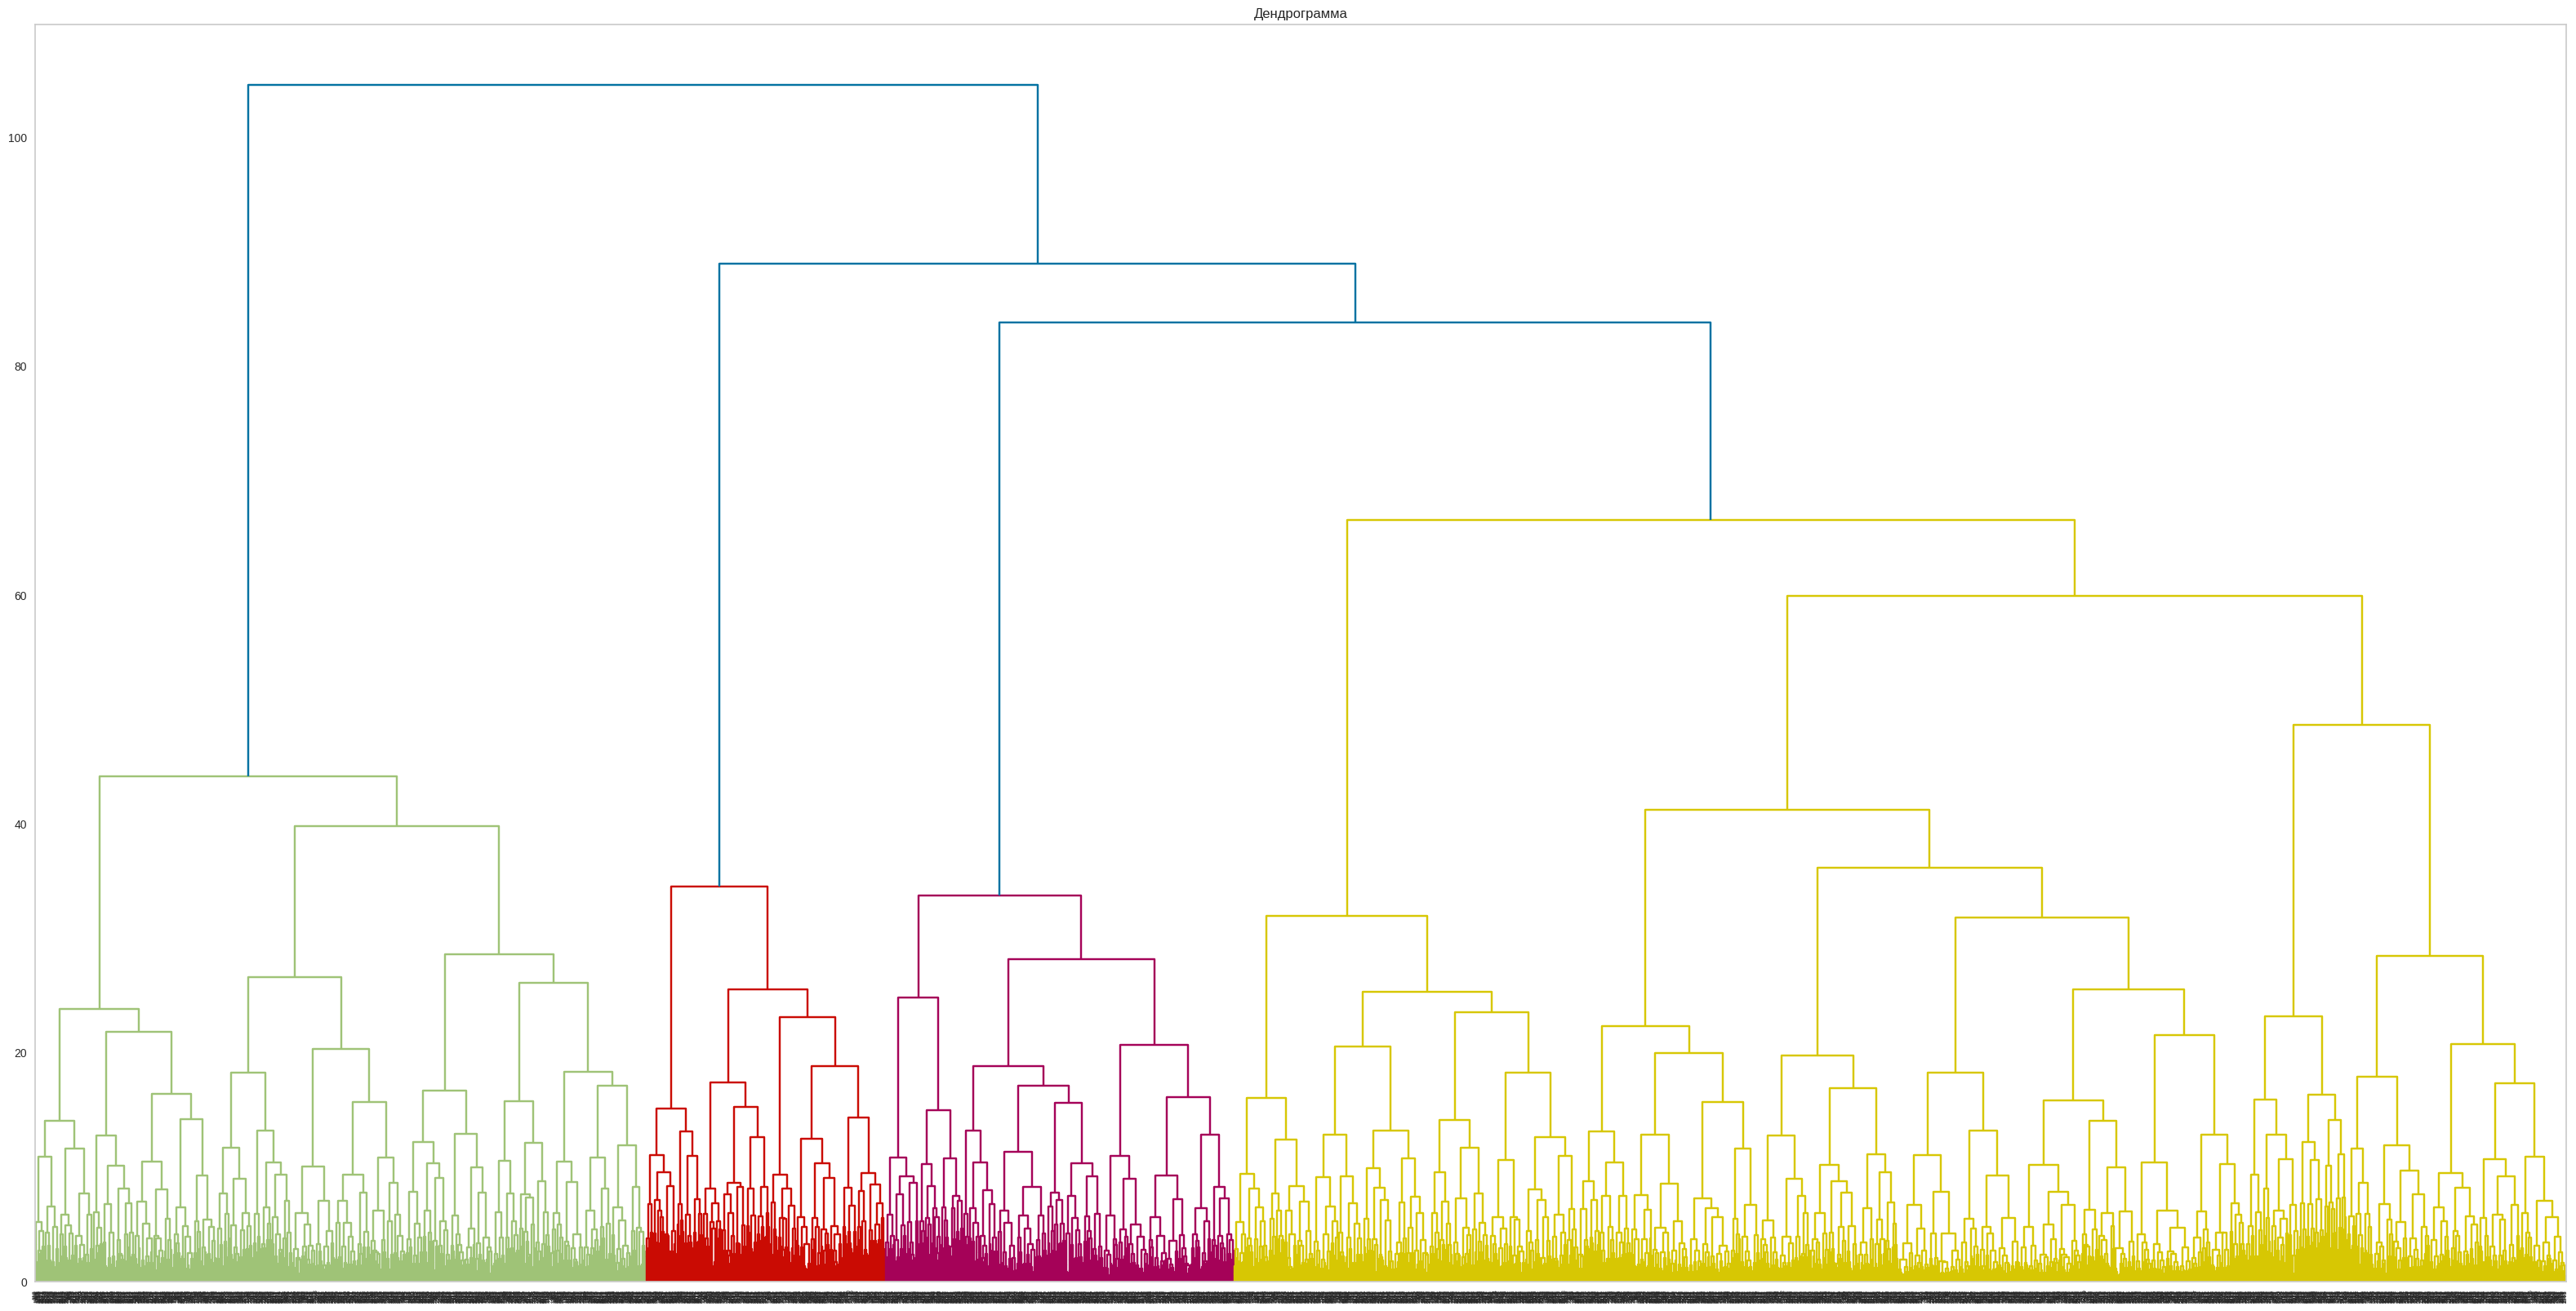

In [ ]:
# стандартизация данных перед работой с алгоритмами
linked = linkage(df_scaled, method = 'ward')# таблица «связок» между объектами

# Визуализация дендрограммы
plt.figure(figsize=(40, 20))
dendrogram(linked, orientation='top', truncate_mode  = 'level')
plt.grid(False)
plt.title('Дендрограмма')
plt.show()
plt.show()

По данной дендограмме нельзя сделать вывод о том, какое количество кластеров будет оптимальным. Однако, судя по тому, что наибольшее количество объединений на уровне менее пяти, можно сделать вывод, что оптимальное количество кластеров от 2 до 5

Были вычислены метрики Силуэта, AMI, ARI

In [ ]:
score_train = silhouette_score(df_scaled, pred)
print("Качество кластеризации по метрике Cилуэта", score_train)

adjust_mutual = adjusted_mutual_info_score(Y, pred)
print("Качество кластеризации по метрике AMI", adjust_mutual)

adjust = adjusted_rand_score(Y, pred)
print("Качество кластеризации по метрике ARI", adjust)


Качество кластеризации по метрике Cилуэта 0.11698964081320212
Качество кластеризации по метрике AMI 0.09574327937654725
Качество кластеризации по метрике ARI -0.06218170629649298




По данным значениям качеств кластеризации по метрикам можно сделать вывод, что модель достаточно неточно группирует значения. Т.к. значение качества кластеризации по метрике силуэта близко к 0, что значит, что объекты внутри кластера достаточно разобщены, значение качества кластеризации по метрике AMI близка к 0, что указывает на низкую степень сходства между разбиением данных на кластеры и исходной информацией, значения качества кластеризации по метрике ARI близки к 0, что значит, что разбиение на кластеры не соответствует исходной информации.


Были определены объекты, относящиеся к одному кластеру и сделаны выводы о каждом кластере, подсчитаны средние показатели по каждому признаку каждого кластера.

In [ ]:
means = df.groupby('aglo_scaled').mean()
means

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster
aglo_scaled,,,,,,,,,,,,,,,
0,0.524720,0.795979,0.425511,0.254120,0.872775,2.754779,0.381674,29.012854,141.429607,2.572841,3.545814,1.821080,1.67802,0.337508,1.176005
1,0.464803,1.000000,0.679089,0.479296,1.000000,10.731884,0.508282,29.722567,164.262405,9.818841,4.286749,2.060995,2.04668,0.038302,0.952381


По этим данным можно сделать вывод, чтО:

**В первом кластере**

*   Большее количество посетителей ушло из клуба
*   Необльшой перевес в сторону одного из полов

**Во втором кластере**



*   Все пользователи живут рядом с клубом
*   Большее количество посетителей сотрудники компании партнера
*   Все пользователи указали телефон
*   Большая средняя длительность контракта
*   Большее количетво средних трат на дополнительные услуги







По данной работе можно сделать вывод, что для большего количества данных оптимальным вариантом кластеризации будет являться  иерархический агломеративный метод, т.к. он последовательно объединяет близкие значения, что сказывается на кластеризации данных. В данной работе была проведена кластеризация данных на основе датасета с данными фитнес зала, по которым были сделаны выводы, что при меньшем количестве посещений в неделю и в месяц выше вероятность того, что человек уйдёт из клуба, так же этот фактор зависит от того, как долго человек посещал фитнес клуб.

Построить матрицу непредвиденных обстоятельств contingency_matrix, дайте описание данной матрицы и интерпретацию.

Для решения данной задачи был использована функция contingency_matrix библиотеки sklearn, который строит матрицу непредвиденных обстоятельств.

In [ ]:

cont_matr =contingency_matrix(Y, pred)
print(cont_matr)


[[2010  929]
 [1024   37]]


По результатам работы данной функции, можно сделать вывод, что среди двух наборов значений количество элементов, которые попали в ячейку (0,0) достаточно большое - 2010, что может говорить о сильном соответствии между заданными метками (Y) и предсказанными (pred), также, важно отметить, что в ячейке (1,1) значение достаточно низкое - 37, что может обозначать то, что значения во втором кластере были предсказаны с низкой точностью, также, в матрице имеются значительные значения вне главной диагонали, что может указывать на смешение меток, что говорит о том, что кластеризация была выполнена достаточно точно лишь для одного кластера.